In [6]:
import pandas as pd

train_path = "C:/Users/Auzan/Documents/UNNES/Semester 4/Penambangan Data dan Analisis Bisnis/Week 4/train.csv"
df_train = pd.read_csv(train_path)

# Mengatasi missing values
df_train.loc[:, 'Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train.loc[:, 'Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

# Mengatasi outliers pada Fare menggunakan IQR
import numpy as np

Q1 = df_train['Fare'].quantile(0.25)
Q3 = df_train['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Batasi outliers dengan menggantinya ke batas atas dan bawah
df_train.loc[:, 'Fare'] = np.where(df_train['Fare'] > upper_bound, upper_bound,
                                   np.where(df_train['Fare'] < lower_bound, lower_bound, df_train['Fare']))

# Encoding data kategorikal
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'], drop_first=True)

# Menghapus kolom yang tidak relevan
df_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], errors='ignore', inplace=True)

# Menampilkan informasi dataset setelah preprocessing
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


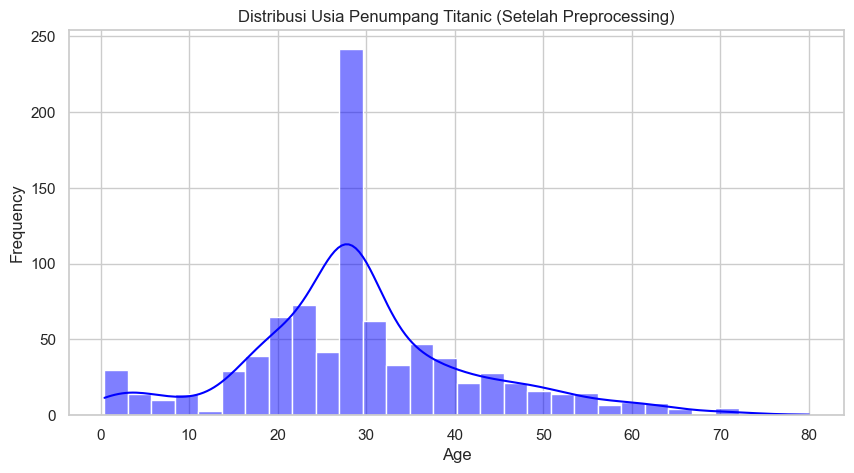

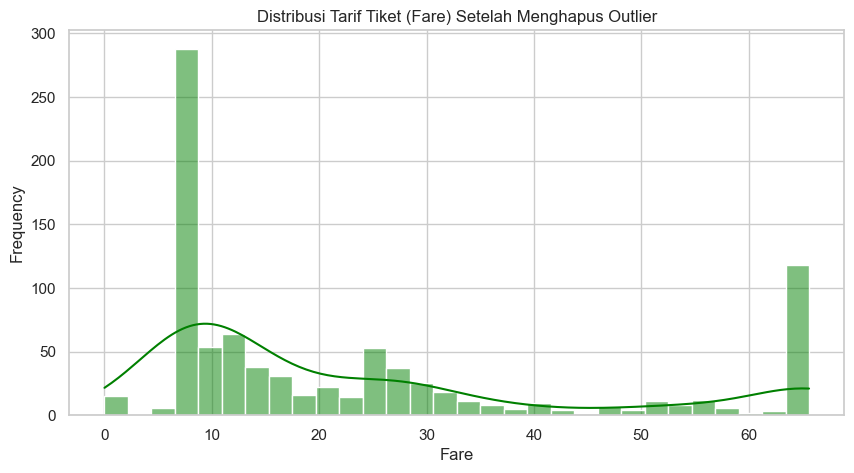

C:\Users\Auzan\AppData\Local\Temp\ipykernel_23888\2502206244.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df_train, ci=None, palette="viridis")
C:\Users\Auzan\AppData\Local\Temp\ipykernel_23888\2502206244.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df_train, ci=None, palette="viridis")


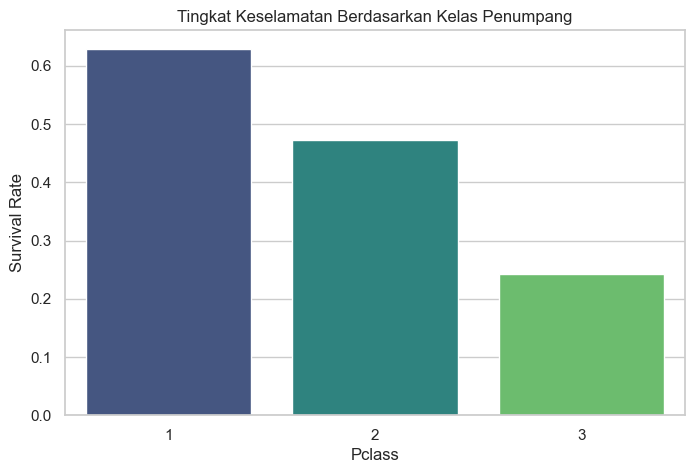

C:\Users\Auzan\AppData\Local\Temp\ipykernel_23888\2502206244.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Sex_male", y="Survived", data=df_train, ci=None, palette="coolwarm")
C:\Users\Auzan\AppData\Local\Temp\ipykernel_23888\2502206244.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex_male", y="Survived", data=df_train, ci=None, palette="coolwarm")


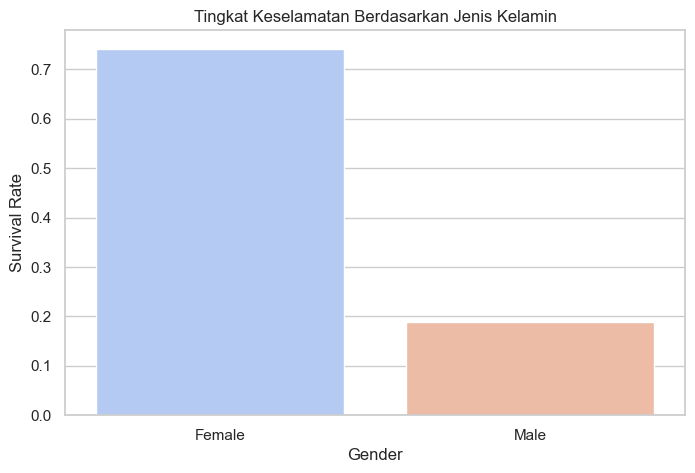

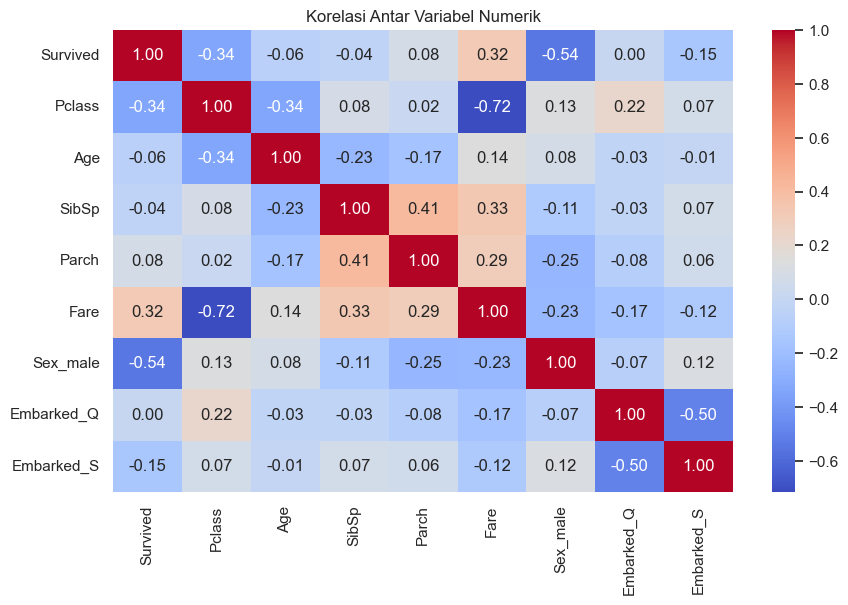

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style seaborn
sns.set(style="whitegrid")

# Plot distribusi usia setelah preprocessing
plt.figure(figsize=(10, 5))
sns.histplot(df_train['Age'], bins=30, kde=True, color='blue')
plt.title("Distribusi Usia Penumpang Titanic (Setelah Preprocessing)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Plot distribusi Fare setelah menangani outliers
plt.figure(figsize=(10, 5))
sns.histplot(df_train['Fare'], bins=30, kde=True, color='green')
plt.title("Distribusi Tarif Tiket (Fare) Setelah Menghapus Outlier")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

# Plot survival rate berdasarkan kelas penumpang
plt.figure(figsize=(8, 5))
sns.barplot(x="Pclass", y="Survived", data=df_train, ci=None, palette="viridis")
plt.title("Tingkat Keselamatan Berdasarkan Kelas Penumpang")
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
plt.show()

# Plot survival rate berdasarkan jenis kelamin
plt.figure(figsize=(8, 5))
sns.barplot(x="Sex_male", y="Survived", data=df_train, ci=None, palette="coolwarm")
plt.xticks([0, 1], ["Female", "Male"])
plt.title("Tingkat Keselamatan Berdasarkan Jenis Kelamin")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

# Korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Variabel Numerik")
plt.show()